## Predict behavior by taste and health and similarity of reasons to those

In [2]:
# from platform import python_version
# python_version()

'3.9.1'

In [2]:
import pandas as pd
import numpy as np
import spacy
nlp = spacy.load('en_core_web_md')

In [24]:
# read full data in

df = pd.read_csv('Though listing and Regulation.csv')

print(df.head())

#### select data for processing


# make a list of columns to process
columnsToUse = ['Progress','gender','location','ethnicity','age','healthyEating_1','dietaryRestriction',
                'foodAllergies','Native English Speak','Eng. Q1','Eng. Q2','Eng. Q3','Eng. Q4','Eng. Q5',
                'Eng. Q6','hunger_1','Condition']
#fill in 20 item colums
for n in range(1,21):
    columnsToUse.append(str(n)+'_choicePre')
    columnsToUse.append(str(n)+'_choicePost')
    columnsToUse.append(str(n)+'_ChoiceTask_Resp')
    columnsToUse.append(str(n)+'_Reason1')
    columnsToUse.append(str(n)+'_Reason2')
    columnsToUse.append(str(n)+'_Reason3')
    columnsToUse.append(str(n)+'_Reason4')
    columnsToUse.append('Food'+str(n)+'_Valence_1')
    columnsToUse.append('Food'+str(n)+'_Valence_2')
    columnsToUse.append('Food'+str(n)+'_Valence_3')
    columnsToUse.append('Food'+str(n)+'_Valence_4')

    columnsToUse.append(str(n)+'_taste')
    columnsToUse.append(str(n)+'_health')
    
columnsToUse.append('debrief1')
columnsToUse.append('debrief2')
# columnsToUse


# create new dataframe with wanted columns and rows
dfInUse = df[columnsToUse].copy()
dfInUse.drop(axis=0, index=[0,1],inplace=True)
print(dfInUse.head())

                                           StartDate  \
0                                         Start Date   
1  {"ImportId":"startDate","timeZone":"America/De...   
2                                   2019-11-28 12:48   
3                                   2019-11-28 12:39   
4                                   2019-11-28 12:38   

                                             EndDate                 Status  \
0                                           End Date          Response Type   
1  {"ImportId":"endDate","timeZone":"America/Denv...  {"ImportId":"status"}   
2                                   2019-11-28 13:10             IP Address   
3                                   2019-11-28 13:10             IP Address   
4                                   2019-11-28 13:11             IP Address   

                  IPAddress                 Progress    Duration (in seconds)  \
0                IP Address                 Progress    Duration (in seconds)   
1  {"ImportId":"ipAddress"

In [25]:
for c in dfInUse.columns:
    print(c)

Progress
gender
location
ethnicity
age
healthyEating_1
dietaryRestriction
foodAllergies
Native English Speak
Eng. Q1
Eng. Q2
Eng. Q3
Eng. Q4
Eng. Q5
Eng. Q6
hunger_1
Condition
1_choicePre
1_choicePost
1_ChoiceTask_Resp
1_Reason1
1_Reason2
1_Reason3
1_Reason4
Food1_Valence_1
Food1_Valence_2
Food1_Valence_3
Food1_Valence_4
1_taste
1_health
2_choicePre
2_choicePost
2_ChoiceTask_Resp
2_Reason1
2_Reason2
2_Reason3
2_Reason4
Food2_Valence_1
Food2_Valence_2
Food2_Valence_3
Food2_Valence_4
2_taste
2_health
3_choicePre
3_choicePost
3_ChoiceTask_Resp
3_Reason1
3_Reason2
3_Reason3
3_Reason4
Food3_Valence_1
Food3_Valence_2
Food3_Valence_3
Food3_Valence_4
3_taste
3_health
4_choicePre
4_choicePost
4_ChoiceTask_Resp
4_Reason1
4_Reason2
4_Reason3
4_Reason4
Food4_Valence_1
Food4_Valence_2
Food4_Valence_3
Food4_Valence_4
4_taste
4_health
5_choicePre
5_choicePost
5_ChoiceTask_Resp
5_Reason1
5_Reason2
5_Reason3
5_Reason4
Food5_Valence_1
Food5_Valence_2
Food5_Valence_3
Food5_Valence_4
5_taste
5_health
6_ch

In [4]:
# initialize new columns to record each reason's similarity to taste and health 
import os
file = os.getcwd()+'\\ThoughtListingDataInUse.csv'
if  not os.path.isfile(file):
    for f in range(1,21): # foods
        for r in range(1,5): # reasons
            dfInUse[str(f)+'_Reason'+str(r)+'_simil_taste'] = np.full((dfInUse.shape[0]),np.nan)
            dfInUse[str(f)+'_Reason'+str(r)+'_simil_health'] = np.full((dfInUse.shape[0]),np.nan)


In [5]:
# calculate similarity to taste and health for each reason
if not os.path.isfile(file):
    for s in range(dfInUse.shape[0]):
        for n in range(1,21):
            for r in range(1,5):
                if isinstance(dfInUse[str(n)+'_Reason'+str(r)].iloc[s],str):
                    temp = dfInUse[str(n)+'_Reason'+str(r)].iloc[s].split()
                    [temp.remove(word) for word in temp if nlp.vocab[word].is_stop];
                    dfInUse[str(n)+'_Reason'+str(r)+'_simil_taste'].iloc[s] = np.asarray([nlp('taste').similarity(nlp(word)) for word in temp]).mean()
                    dfInUse[str(n)+'_Reason'+str(r)+'_simil_health'].iloc[s] = np.asarray([nlp('health').similarity(nlp(word)) for word in temp]).mean()

    dfInUse.to_csv(file)
else:
    dfInUse = pd.read_csv(file)       

In [29]:
for c in dfInUse.columns:
    print(c)

Unnamed: 0
Progress
gender
location
ethnicity
age
healthyEating_1
dietaryRestriction
foodAllergies
Native English Speak
Eng. Q1
Eng. Q2
Eng. Q3
Eng. Q4
Eng. Q5
Eng. Q6
hunger_1
Condition
1_choicePre
1_choicePost
1_ChoiceTask_Resp
1_Reason1
1_Reason2
1_Reason3
1_Reason4
Food1_Valence_1
Food1_Valence_2
Food1_Valence_3
Food1_Valence_4
1_taste
1_health
2_choicePre
2_choicePost
2_ChoiceTask_Resp
2_Reason1
2_Reason2
2_Reason3
2_Reason4
Food2_Valence_1
Food2_Valence_2
Food2_Valence_3
Food2_Valence_4
2_taste
2_health
3_choicePre
3_choicePost
3_ChoiceTask_Resp
3_Reason1
3_Reason2
3_Reason3
3_Reason4
Food3_Valence_1
Food3_Valence_2
Food3_Valence_3
Food3_Valence_4
3_taste
3_health
4_choicePre
4_choicePost
4_ChoiceTask_Resp
4_Reason1
4_Reason2
4_Reason3
4_Reason4
Food4_Valence_1
Food4_Valence_2
Food4_Valence_3
Food4_Valence_4
4_taste
4_health
5_choicePre
5_choicePost
5_ChoiceTask_Resp
5_Reason1
5_Reason2
5_Reason3
5_Reason4
Food5_Valence_1
Food5_Valence_2
Food5_Valence_3
Food5_Valence_4
5_taste
5_

In [7]:
## replace responses and ratings with dummy codes
# parenthesis is for breaking line
replacements = ({'No, I would not like to eat this':0,'Yes, I would like to eat this':1,
                 'Strong dislike':-1.5, 'Dislike':-.5, 'Like': .5, 'Strong like':1.5,
                'Very unhealthy':-2, 'Slightly unhealthy':-1,'Neither healthy nor unhealthy.':0,
                 'Slightly healthy':1, 'Very healthy':2,
                 'Very untasty':-2, 'Slightly untasty':-1,'Neither tasty nor untasty.':0,
                 'Slightly tasty':1, 'Very tasty':2, 'Extremely positive':1.5, 'Moderately positive':1, 
                 'Slightly positve':.5,'Neither negative nor positive':0,'Slightly negative':-.5,
                 'Moderately negative':-1,'Extremely negative':-1.5})
dfInUse.replace(replacements,inplace=True)

In [8]:
for f in range(1,21):
    for r in range(1,5):
        dfInUse.rename(columns={'Food'+str(f)+'_Valence_'+str(r):str(f)+'_Valence_'+str(r)}, inplace=True)

In [9]:
dfInUse['1_Valence_1']

0     -0.5
1      0.5
2     -1.0
3      1.5
4     -0.5
      ... 
266    NaN
267    NaN
268    NaN
269   -1.5
270   -1.5
Name: 1_Valence_1, Length: 271, dtype: float64

In [10]:
def get_simil(dfInUse, cond):
    ### extracts mean similarity of first reason to taste and health
    ### across foods for each subject and condition ('Natural','Health')
    dff = dfInUse[(dfInUse['Condition']==cond)& (dfInUse['Progress']==100)].copy()
    simil_mean = np.full((dff.shape[0],2),np.nan)
    for snum in range(dff.shape[0]):
        ## initialize and get the first food data
#         y = np.full((20),np.nan)
        X = np.full((20,2),np.nan)

        # apped choice and first reason for foods 2-20
        for f in range(1,21):
#             y[f-1]   = dff[str(f)+'_'+resp].iloc[snum]
            X[f-1,:] = np.array([dff[str(f)+'_Reason1_simil_taste'].iloc[snum],dff[str(f)+'_Reason1_simil_health'].iloc[snum]])


        simil_mean[snum,:] = np.nanmean(X,axis=0)
    return simil_mean
    

In [22]:
def print_stats(NatValues,HealthValues,valueType, predictors):
    from scipy import stats
    for p, pred in enumerate(predictors):
        [t,p] = stats.ttest_ind(NatValues[:,p],HealthValues[:,p])
        print(f'{valueType}:  {pred} in Natural vs Health: t= {round(t,2)}, p= {round(p,3)}')

    [t,p] = stats.ttest_rel(NatValues[:,0],NatValues[:,1])
    print(f'{valueType}:  {predictors[0]} vs {predictors[1]} in Natural: t= {round(t,2)}, p= {round(p,3)}')

    [t,p] = stats.ttest_rel(HealthValues[:,0],HealthValues[:,1])
    print(f'{valueType}:  {predictors[0]} vs {predictors[1]} in Health: t= {round(t,2)}, p= {round(p,3)}')
    
    if len(predictors) == 4:
        [t,p] = stats.ttest_rel(NatValues[:,2],NatValues[:,3])
        print(f'{valueType}:  {predictors[2]} vs {predictors[3]} in Natural: t= {round(t,2)}, p= {round(p,3)}')

        [t,p] = stats.ttest_rel(HealthValues[:,2],HealthValues[:,3])
        print(f'{valueType}:  {predictors[2]} vs {predictors[3]} in Health: t= {round(t,2)}, p= {round(p,3)}')

        


In [20]:
def plot_(NatValues, HealthValues, valueType, atts):
### plot
    from scipy import stats
    import numpy as np
    from matplotlib import pyplot as plt
    
    conds = ['Natural','Health']
#     atts  = ['Taste','Health']
    colors   = ['royalblue','salmon','blue','red']
    colors   = colors[:len(atts)]
    width = .3
    temp = [0]*2
    temp[0] = NatValues
    temp[1] = HealthValues
    x = np.asarray(range(len(atts)))
    dist = [-.5,.5]
#     dist = dist[round(len(dist)/len(atts))-1:round(len(dist)/len(atts))-1+len(atts)]
    
    fig, ax = plt.subplots()
    for c, cond in enumerate(conds):
        att = ax.bar(x+np.asarray(dist[c])*width,np.nanmean(temp[c],axis=0),width,label =cond,color=colors[c])
        att = (ax.errorbar(x+np.asarray(dist[c])*width,
                           np.nanmean(temp[c],axis=0),yerr=stats.sem(temp[c],axis=0),ecolor='k',fmt='none'))

    ax.set_ylabel(valueType,fontdict={'fontsize':16,'fontweight': 'normal'})
    ax.set_xticks(x)
    ax.set_xticklabels(atts,fontdict={'fontsize':7,'fontweight': 'normal'})
#     ax.set_title(study+ ', N='+str(choiceBetas.shape[0]),fontdict={'fontsize':20,'fontweight': 'bold'})

    #remove top frame border
    ax.spines['top'].set_visible(False)
    #remove right frame border
    ax.spines['right'].set_visible(False)
    plt.legend(fontsize = 12, prop = {'weight':'normal'},frameon=False)
    # ax.grid(b=None)
    plt.show()

    # savefile = osp.join('Figures','choiceBetas.png')
    # fig.savefig(savefile)


In [13]:
## create model input for Natural condition
def get_linear_reg_coefs(dfInUse, cond, resp, predictors):
    dff = dfInUse[(dfInUse['Condition']==cond) & (dfInUse['Progress']==100)].copy()
    coefs = np.full((dff.shape[0],len(predictors)),np.nan)

    for snum in range(dff.shape[0]):
        y = np.full((20),np.nan)
        X = np.full((20,len(predictors)),np.nan)
        temp = np.array([])
        for f in range(1,21):
            y[f-1]   = dff[str(f)+'_'+resp].iloc[snum]
            for p, pred in enumerate(predictors):
                if pred.find('X') < 0: # -1 if X doesnt exist in pred; index if it does
                    X[f-1,p] = np.append(temp, np.array([dff[str(f)+'_'+pred].iloc[snum]]))
                else:
                    X[f-1,p] = (np.append(temp, np.array([dff[str(f)+'_'+pred[:pred.find('X')]].iloc[snum]*
                                                          dff[str(f)+'_'+pred[pred.find('X')+1:]].iloc[snum]])))

        X = X[~np.isnan(y),:]
        y = y[~np.isnan(y)]
        y = y[~np.any(np.isnan(X), axis=1)]
        X = X[~np.any(np.isnan(X), axis=1)]

        ## train linear regression model for Natural condition
        from sklearn.linear_model import LinearRegression
        LR = LinearRegression()
        LR.fit(X,y)
        coefs[snum,:] = LR.coef_
    return coefs

### replicate: find contribution of taste and health to value (response, pre- and post-liking)

contribution to value:  taste in Natural vs Health: t= 1.24, p= 0.216
contribution to value:  health in Natural vs Health: t= -6.06, p= 0.0
contribution to value:  taste vs health in Natural: t= 13.53, p= 0.0
contribution to value:  taste vs health in Health: t= 4.44, p= 0.0


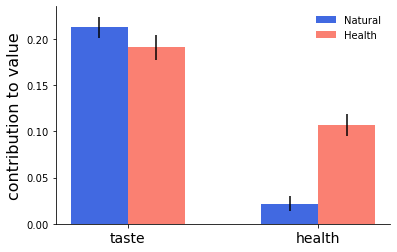

In [58]:
### response
predictors = ['taste','health']
coefsNat    = get_linear_reg_coefs(dfInUse,'Natural','ChoiceTask_Resp',predictors) 
coefsHealth = get_linear_reg_coefs(dfInUse,'Health','ChoiceTask_Resp',predictors) 
print_stats(coefsNat,coefsHealth,'contribution to value',predictors)
plot_(coefsNat,coefsHealth,'contribution to value',predictors)

contribution to value:  taste in Natural vs Health: t= -1.02, p= 0.31
contribution to value:  health in Natural vs Health: t= -0.44, p= 0.659
contribution to value:  taste vs health in Natural: t= 12.32, p= 0.0
contribution to value:  taste vs health in Health: t= 12.93, p= 0.0


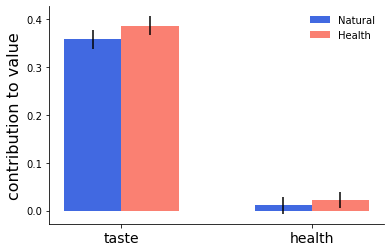

In [59]:
### pre-liking
predictors = ['taste','health']
coefsNat    = get_linear_reg_coefs(dfInUse,'Natural','choicePre',predictors) 
coefsHealth = get_linear_reg_coefs(dfInUse,'Health','choicePre',predictors) 
print_stats(coefsNat,coefsHealth,'contribution to value',predictors)
plot_(coefsNat,coefsHealth,'contribution to value',predictors)

contribution to value:  taste in Natural vs Health: t= 0.42, p= 0.673
contribution to value:  health in Natural vs Health: t= -4.41, p= 0.0
contribution to value:  taste vs health in Natural: t= 14.46, p= 0.0
contribution to value:  taste vs health in Health: t= 9.03, p= 0.0


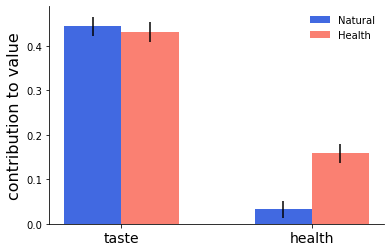

In [60]:
### post-liking
coefsNat    = get_linear_reg_coefs(dfInUse,'Natural','choicePost',predictors) 
coefsHealth = get_linear_reg_coefs(dfInUse,'Health','choicePost',predictors) 
print_stats(coefsNat,coefsHealth,'contribution to value',predictors)
plot_(coefsNat,coefsHealth,'contribution to value',predictors)

change in contribution to value:  taste in Natural vs Health: t= 1.64, p= 0.102
change in contribution to value:  health in Natural vs Health: t= -4.52, p= 0.0
change in contribution to value:  taste vs health in Natural: t= 2.84, p= 0.005
change in contribution to value:  taste vs health in Health: t= -3.07, p= 0.003


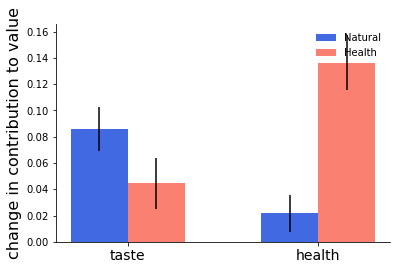

In [61]:
### change in contribution post vs pre
coefsNat    = (get_linear_reg_coefs(dfInUse,'Natural','choicePost',predictors)-
               get_linear_reg_coefs(dfInUse,'Natural','choicePre',predictors))
coefsHealth = (get_linear_reg_coefs(dfInUse,'Health','choicePost',predictors)-
               get_linear_reg_coefs(dfInUse,'Health','choicePre',predictors))
print_stats(coefsNat,coefsHealth,'change in contribution to value',predictors)
plot_(coefsNat,coefsHealth,'change in contribution to value',predictors)

### check: is similarity of reason to taste and health modified by condition?

similarity of first reason:  Reason1_simil_taste in Natural vs Health: t= 2.48, p= 0.014
similarity of first reason:  Reason1_simil_health in Natural vs Health: t= -6.73, p= 0.0
similarity of first reason:  Reason1_simil_taste vs Reason1_simil_health in Natural: t= 31.41, p= 0.0
similarity of first reason:  Reason1_simil_taste vs Reason1_simil_health in Health: t= 14.79, p= 0.0


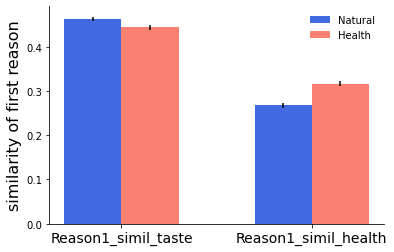

In [63]:
### get similaries and compare ###
predictors = ['Reason1_simil_taste','Reason1_simil_health']
similNat    = get_simil(dfInUse,'Natural')
similHealth = get_simil(dfInUse,'Health')
print_stats(similNat,similHealth,'similarity of first reason',predictors)
plot_(similNat,similHealth,'similarity of first reason',predictors)

### can similarity of the reason to taste and health predict value (response, pre- and post-liking)


contribution to value:  Reason1_simil_taste in Natural vs Health: t= -0.56, p= 0.575
contribution to value:  Reason1_simil_health in Natural vs Health: t= -0.06, p= 0.954
contribution to value:  Reason1_simil_taste vs Reason1_simil_health in Natural: t= -1.0, p= 0.319
contribution to value:  Reason1_simil_taste vs Reason1_simil_health in Health: t= -1.0, p= 0.319


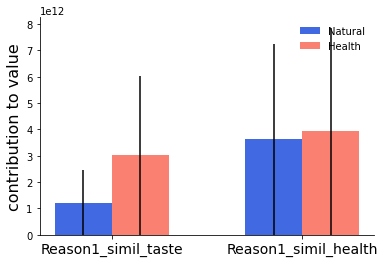

In [64]:
###
predictors = ['Reason1_simil_taste','Reason1_simil_health']
coefsNat    = get_linear_reg_coefs(dfInUse,'Natural','ChoiceTask_Resp',predictors) 
coefsHealth = get_linear_reg_coefs(dfInUse,'Health','ChoiceTask_Resp',predictors) 
print_stats(coefsNat,coefsHealth,'contribution to value',predictors)
plot_(coefsNat,coefsHealth,'contribution to value',predictors)

In [65]:
### there are some huge coefs inflating the mean
cond = 'Natural'
resp = 'ChoiceTask_Resp'
predictors = ['Reason1_simil_taste','Reason1_simil_health']
coefs = get_linear_reg_coefs(dfInUse,cond,resp,predictors)
np.where(abs(coefs[:,1])>30)
# coefs[17,:]

(array([17, 70], dtype=int64),)

In [66]:
snum = 1
dff = dfInUse[(dfInUse['Condition']==cond)& (dfInUse['Progress']==100)].copy()
coefs = np.full((dff.shape[0],2),np.nan)
y = np.full((20),np.nan)
X = np.full((20,2),np.nan)

for f in range(1,21):
    y[f-1]   = dff[str(f)+'_'+resp].iloc[snum]
    X[f-1,:] = np.array([dff[str(f)+'_'+predictors[0]].iloc[snum],dff[str(f)+'_'+predictors[1]].iloc[snum]])


In [67]:
### This is why the reg coef was inflated for this subject (using exact same reason for response creating a one-to-one mapping)
for f in range(1,21):
    print(dff[str(f)+'_Reason1'].iloc[17])
    


yummy
yummy
gross
gross
gross
yummy
yummy
gross
gross
gross
gross
gross
yummy
yummy
yummy
gross
gross
gross
gross
gross


contribution to value:  Reason1_simil_taste in Natural vs Health: t= 0.77, p= 0.444
contribution to value:  Reason1_simil_health in Natural vs Health: t= -1.61, p= 0.108
contribution to value:  Reason1_simil_taste vs Reason1_simil_health in Natural: t= 2.9, p= 0.004
contribution to value:  Reason1_simil_taste vs Reason1_simil_health in Health: t= -0.09, p= 0.931


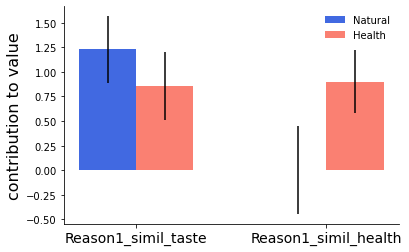

In [68]:
### repeat after eliminating large coefs
### response
predictors = ['Reason1_simil_taste','Reason1_simil_health']
coefsNat    = get_linear_reg_coefs(dfInUse,'Natural','ChoiceTask_Resp',predictors) 
coefsHealth = get_linear_reg_coefs(dfInUse,'Health','ChoiceTask_Resp',predictors) 
coefsNat = coefsNat[~np.any(abs(coefsNat)>50,axis=1),:]
coefsHealth = coefsHealth[~np.any(abs(coefsHealth)>50,axis=1),:]

# coefsNat.shape
# coefsHealth.shape
print_stats(coefsNat,coefsHealth,'contribution to value',predictors)
plot_(coefsNat,coefsHealth,'contribution to value',predictors)

In [69]:
np.mean(coefsNat,axis=0)

array([1.22814802, 0.003383  ])

contribution to value:  Reason1_simil_taste in Natural vs Health: t= 2.01, p= 0.046
contribution to value:  Reason1_simil_health in Natural vs Health: t= 0.04, p= 0.969
contribution to value:  Reason1_simil_taste vs Reason1_simil_health in Natural: t= 1.68, p= 0.096
contribution to value:  Reason1_simil_taste vs Reason1_simil_health in Health: t= -0.07, p= 0.945


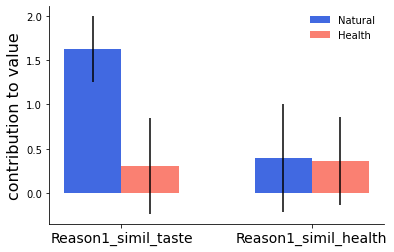

In [70]:
### pre-liking
predictors = ['Reason1_simil_taste','Reason1_simil_health']
coefsNat    = get_linear_reg_coefs(dfInUse,'Natural','choicePre',predictors) 
coefsHealth = get_linear_reg_coefs(dfInUse,'Health','choicePre',predictors) 
coefsNat = coefsNat[~np.any(abs(coefsNat)>50,axis=1),:]
coefsHealth = coefsHealth[~np.any(abs(coefsHealth)>50,axis=1),:]

# coefsNat.shape
# coefsHealth.shape
print_stats(coefsNat,coefsHealth,'contribution to value',predictors)
plot_(coefsNat,coefsHealth,'contribution to value',predictors)

contribution to value:  Reason1_simil_taste in Natural vs Health: t= 1.37, p= 0.172
contribution to value:  Reason1_simil_health in Natural vs Health: t= -0.86, p= 0.388
contribution to value:  Reason1_simil_taste vs Reason1_simil_health in Natural: t= 2.59, p= 0.011
contribution to value:  Reason1_simil_taste vs Reason1_simil_health in Health: t= 0.37, p= 0.71


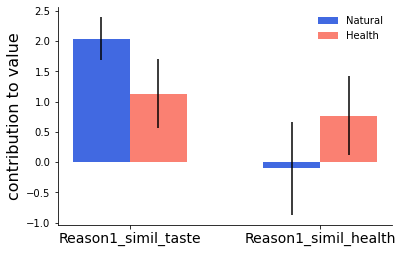

In [71]:
### post-liking
predictors = ['Reason1_simil_taste','Reason1_simil_health']
coefsNat    = get_linear_reg_coefs(dfInUse,'Natural','choicePost',predictors) 
coefsHealth = get_linear_reg_coefs(dfInUse,'Health','choicePost',predictors) 
coefsNat = coefsNat[~np.any(abs(coefsNat)>50,axis=1),:]
coefsHealth = coefsHealth[~np.any(abs(coefsHealth)>50,axis=1),:]

# coefsNat.shape
# coefsHealth.shape
print_stats(coefsNat,coefsHealth,'contribution to value',predictors)
plot_(coefsNat,coefsHealth,'contribution to value',predictors)

In [73]:
# is health in Health condition significant?
from scipy import stats
[t,p] = stats.ttest_1samp(coefsHealth[:,1],0)
print(t,p)

1.1812022402639184 0.24011701147548137


change in contribution to value:  Reason1_simil_taste in Natural vs Health: t= -0.76, p= 0.451
change in contribution to value:  Reason1_simil_health in Natural vs Health: t= -0.78, p= 0.434
change in contribution to value:  Reason1_simil_taste vs Reason1_simil_health in Natural: t= 0.95, p= 0.343
change in contribution to value:  Reason1_simil_taste vs Reason1_simil_health in Health: t= 0.68, p= 0.498


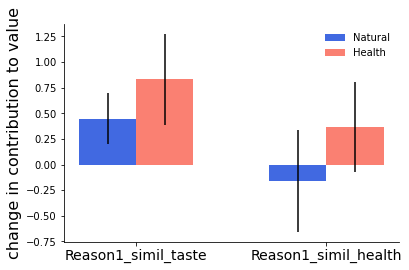

In [74]:
# change in contribution to liking
predictors = ['Reason1_simil_taste','Reason1_simil_health']
coefsNat    = (get_linear_reg_coefs(dfInUse,'Natural','choicePost',predictors)-
               get_linear_reg_coefs(dfInUse,'Natural','choicePre',predictors))
coefsHealth = (get_linear_reg_coefs(dfInUse,'Health','choicePost',predictors)-
               get_linear_reg_coefs(dfInUse,'Health','choicePre',predictors))
coefsNat = coefsNat[~np.any(abs(coefsNat)>50,axis=1),:]
coefsHealth = coefsHealth[~np.any(abs(coefsHealth)>50,axis=1),:]

print_stats(coefsNat,coefsHealth,'change in contribution to value',predictors)
plot_(coefsNat,coefsHealth,'change in contribution to value',predictors)

change in contribution to value:  Valence_1XReason1_simil_taste in Natural vs Health: t= 1.64, p= 0.103
change in contribution to value:  Valence_1XReason1_simil_health in Natural vs Health: t= -2.17, p= 0.031
change in contribution to value:  Valence_1XReason1_simil_taste vs Valence_1XReason1_simil_health in Natural: t= 1.02, p= 0.309
change in contribution to value:  Valence_1XReason1_simil_taste vs Valence_1XReason1_simil_health in Health: t= -2.6, p= 0.011


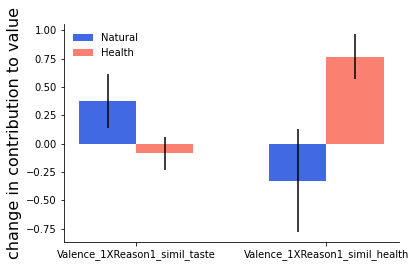

In [16]:
# change in contribution to liking
predictors = ['Valence_1XReason1_simil_taste','Valence_1XReason1_simil_health']
coefsNat    = (get_linear_reg_coefs(dfInUse,'Natural','choicePost',predictors)-
               get_linear_reg_coefs(dfInUse,'Natural','choicePre',predictors))
coefsHealth = (get_linear_reg_coefs(dfInUse,'Health','choicePost',predictors)-
               get_linear_reg_coefs(dfInUse,'Health','choicePre',predictors))
coefsNat = coefsNat[~np.any(abs(coefsNat)>50,axis=1),:]
coefsHealth = coefsHealth[~np.any(abs(coefsHealth)>50,axis=1),:]

print_stats(coefsNat,coefsHealth,'change in contribution to value',predictors)
plot_(coefsNat,coefsHealth,'change in contribution to value',predictors)

change in contribution to value:  taste in Natural vs Health: t= 1.24, p= 0.215
change in contribution to value:  health in Natural vs Health: t= -2.6, p= 0.01
change in contribution to value:  Valence_1XReason1_simil_taste in Natural vs Health: t= 1.46, p= 0.147
change in contribution to value:  Valence_1XReason1_simil_health in Natural vs Health: t= -1.5, p= 0.134
change in contribution to value:  taste vs health in Natural: t= 1.56, p= 0.122
change in contribution to value:  taste vs health in Health: t= -2.22, p= 0.028
change in contribution to value:  Valence_1XReason1_simil_taste vs Valence_1XReason1_simil_health in Natural: t= 1.05, p= 0.298
change in contribution to value:  Valence_1XReason1_simil_taste vs Valence_1XReason1_simil_health in Health: t= -1.22, p= 0.225


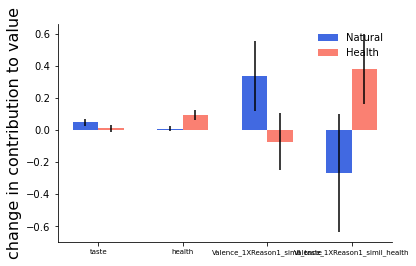

In [23]:
# change in contribution to liking
predictors = ['taste','health','Valence_1XReason1_simil_taste','Valence_1XReason1_simil_health']
coefsNat    = (get_linear_reg_coefs(dfInUse,'Natural','choicePost',predictors)-
               get_linear_reg_coefs(dfInUse,'Natural','choicePre',predictors))
coefsHealth = (get_linear_reg_coefs(dfInUse,'Health','choicePost',predictors)-
               get_linear_reg_coefs(dfInUse,'Health','choicePre',predictors))
coefsNat = coefsNat[~np.any(abs(coefsNat)>50,axis=1),:]
coefsHealth = coefsHealth[~np.any(abs(coefsHealth)>50,axis=1),:]

print_stats(coefsNat,coefsHealth,'change in contribution to value',predictors)
plot_(coefsNat,coefsHealth,'change in contribution to value',predictors)

In [19]:
dfInUse['1_taste']

0      0.0
1      2.0
2     -1.0
3      2.0
4     -1.0
      ... 
266    NaN
267    NaN
268    NaN
269    NaN
270    NaN
Name: 1_taste, Length: 271, dtype: float64

### try similarity regression models on group level

#### reason 1 and choice task response

In [76]:
def get_goup_linear_reg_input(dfInUse,cond,resp,predictors):
    ## create model input for Natural condition
    ## initialize and get the first food data
    y = np.asarray(dfInUse[dfInUse['Condition']==cond]['1_'+resp])
    X = np.full((y.shape[0],len(predictors)),np.nan)
    for p, pred in enumerate(predictors):
        if pred.find('X') < 0:
            X[:,p] = np.asarray(dfInUse[dfInUse['Condition']==cond]['1_'+pred])
        else:
            X[:,p] = (np.asarray(dfInUse[dfInUse['Condition']==cond]['1_'+pred[:pred.find('X')]])*
            np.asarray(dfInUse[dfInUse['Condition']==cond]['1_'+pred[pred.find('X')+1:]]))

    # apped choice and first reason for foods 2-20
    for f in range(2,21):
        temp      = np.full((dfInUse[dfInUse['Condition']==cond].shape[0],len(predictors)),np.nan)
        for p, pred in enumerate(predictors):
            if pred.find('X') < 0:
                temp[:,p] = np.asarray(dfInUse[dfInUse['Condition']==cond][str(f)+'_'+pred])
            else:
                temp[:,p] = (np.asarray(dfInUse[dfInUse['Condition']==cond][str(f)+'_'+pred[:pred.find('X')]])*
                np.asarray(dfInUse[dfInUse['Condition']==cond][str(f)+'_'+pred[pred.find('X')+1:]]))
        
        y      = np.append(y,dfInUse[dfInUse['Condition']==cond][str(f)+'_'+resp])
        X      = np.append(X,temp,axis=0)
    
    return X,y

In [100]:
# alternatively f_regression from sklearn.feature_selection could be used
# Since the p-values are obtained through certain statistics, we need the 'stat' module from scipy.stats
import numpy as np
import pandas as pd
from sklearn import linear_model
import scipy.stats as stat

# Since we are using an object oriented language such as Python, we can simply define our own 
# LinearRegression class (the same one from sklearn)
# By typing the code below we will ovewrite a part of the class with one that includes p-values
# Here's the full source code of the ORIGINAL class: https://github.com/scikit-learn/scikit-learn/blob/7b136e9/sklearn/linear_model/base.py#L362


class LinearRegression(linear_model.LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (y.shape[1], X.shape[1])
    which is (n_features, n_coefs)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """
    
    # nothing changes in __init__
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
        self.positive = False

    
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        
        # Calculate SSE (sum of squared errors)
        # and SE (standard error)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])

        # compute the t-statistic for each feature
        self.t = self.coef_ / se
        # find the p-value for each feature
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self


In [78]:
def print_reg_stats (model,cond,resp,predictors):
    for p, pred in enumerate(predictors):
        print(f'{pred} correlation with {resp} in {cond} : {round(model.coef_[p],2)}, p= {round(model.p[p],3)}')
#     print(f'{predictors[1]} correlation with {resp} in {cond} : {round(model.coef_[1],2)}, p= {round(model.p[1],3)}')


In [80]:
## contribution of similarity to choice
predictors = ['Reason1_simil_taste','Reason1_simil_health']
[X,y] = get_goup_linear_reg_input(dfInUse,'Natural','ChoiceTask_Resp',predictors)
X = X[~np.isnan(y),:]
y = y[~np.isnan(y)]
y = y[~np.any(np.isnan(X), axis=1)]
X = X[~np.any(np.isnan(X), axis=1)]

## train linear regression model for Natural condition
# from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,y)
print_reg_stats(LR,'Natural','ChoiceTask_Resp',predictors)

Reason1_simil_taste correlation with ChoiceTask_Resp in Natural : 0.83, p= 0.0
Reason1_simil_health correlation with ChoiceTask_Resp in Natural : 0.26, p= 0.005


In [449]:
[X,y] = get_goup_linear_reg_input(dfInUse,'Health','ChoiceTask_Resp',['Reason1_simil_taste','Reason1_simil_health'])
X = X[~np.isnan(y),:]
y = y[~np.isnan(y)]
y = y[~np.any(np.isnan(X), axis=1)]
X = X[~np.any(np.isnan(X), axis=1)]

## train linear regression model for Natural condition
# from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,y)
print_reg_stats(LR,'Health','ChoiceTask_Resp',['Reason1_simil_taste','Reason1_simil_health'])

Reason1_simil_taste correlation with ChoiceTask_Resp in Health : 0.75, p= 0.0
Reason1_simil_health correlation with ChoiceTask_Resp in Health : 0.45, p= 0.0


In [81]:
## contribution of similarityXvalence to choice
predictors = ['Valence_1XReason1_simil_taste','Valence_1XReason1_simil_health']
[X,y] = get_goup_linear_reg_input(dfInUse,'Natural','ChoiceTask_Resp',predictors)
X = X[~np.isnan(y),:]
y = y[~np.isnan(y)]
y = y[~np.any(np.isnan(X), axis=1)]
X = X[~np.any(np.isnan(X), axis=1)]

## train linear regression model for Natural condition
# from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,y)
print_reg_stats(LR,'Natural','ChoiceTask_Resp',predictors)

Valence_1XReason1_simil_taste correlation with ChoiceTask_Resp in Natural : 0.6, p= 0.0
Valence_1XReason1_simil_health correlation with ChoiceTask_Resp in Natural : 0.32, p= 0.0


In [82]:
predictors = ['Valence_1XReason1_simil_taste','Valence_1XReason1_simil_health']
[X,y] = get_goup_linear_reg_input(dfInUse,'Health','ChoiceTask_Resp',predictors)
X = X[~np.isnan(y),:]
y = y[~np.isnan(y)]
y = y[~np.any(np.isnan(X), axis=1)]
X = X[~np.any(np.isnan(X), axis=1)]

## train linear regression model for Natural condition
# from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,y)
print_reg_stats(LR,'Health','ChoiceTask_Resp',predictors)

Valence_1XReason1_simil_taste correlation with ChoiceTask_Resp in Health : 0.64, p= 0.0
Valence_1XReason1_simil_health correlation with ChoiceTask_Resp in Health : -0.0, p= 0.937


In [84]:
## contribution of similarity to pre-liking
predictors = ['Reason1_simil_taste','Reason1_simil_health']
[X,y] = get_goup_linear_reg_input(dfInUse,'Natural','choicePre',predictors)
X = X[~np.isnan(y),:]
y = y[~np.isnan(y)]
y = y[~np.any(np.isnan(X), axis=1)]
X = X[~np.any(np.isnan(X), axis=1)]

## train linear regression model for Natural condition
# from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,y)
print_reg_stats(LR,'Natural','choicePre',predictors)

Reason1_simil_taste correlation with choicePre in Natural : 0.86, p= 0.0
Reason1_simil_health correlation with choicePre in Natural : 0.11, p= 0.544


In [85]:
[X,y] = get_goup_linear_reg_input(dfInUse,'Health','choicePre',predictors)
X = X[~np.isnan(y),:]
y = y[~np.isnan(y)]
y = y[~np.any(np.isnan(X), axis=1)]
X = X[~np.any(np.isnan(X), axis=1)]

## train linear regression model for Natural condition
# from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,y)
print_reg_stats(LR,'Health','choicePre',predictors)

Reason1_simil_taste correlation with choicePre in Health : 1.35, p= 0.0
Reason1_simil_health correlation with choicePre in Health : 0.23, p= 0.127


In [86]:
## contribution of similarityXvalence to pre-liking
predictors = ['Valence_1XReason1_simil_taste','Valence_1XReason1_simil_health']
[X,y] = get_goup_linear_reg_input(dfInUse,'Natural','choicePre',predictors)
X = X[~np.isnan(y),:]
y = y[~np.isnan(y)]
y = y[~np.any(np.isnan(X), axis=1)]
X = X[~np.any(np.isnan(X), axis=1)]

## train linear regression model for Natural condition
# from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,y)
print_reg_stats(LR,'Natural','choicePre',predictors)

Valence_1XReason1_simil_taste correlation with choicePre in Natural : 1.15, p= 0.0
Valence_1XReason1_simil_health correlation with choicePre in Natural : 0.28, p= 0.012


In [87]:
predictors = ['Valence_1XReason1_simil_taste','Valence_1XReason1_simil_health']
[X,y] = get_goup_linear_reg_input(dfInUse,'Health','choicePre',predictors)
X = X[~np.isnan(y),:]
y = y[~np.isnan(y)]
y = y[~np.any(np.isnan(X), axis=1)]
X = X[~np.any(np.isnan(X), axis=1)]

## train linear regression model for Natural condition
# from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,y)
print_reg_stats(LR,'Health','choicePre',predictors)

Valence_1XReason1_simil_taste correlation with choicePre in Health : 1.46, p= 0.0
Valence_1XReason1_simil_health correlation with choicePre in Health : -1.0, p= 0.0


In [88]:
## contribution of similarity to post-liking
predictors = ['Reason1_simil_taste','Reason1_simil_health']
[X,y] = get_goup_linear_reg_input(dfInUse,'Natural','choicePost',predictors)
X = X[~np.isnan(y),:]
y = y[~np.isnan(y)]
y = y[~np.any(np.isnan(X), axis=1)]
X = X[~np.any(np.isnan(X), axis=1)]

## train linear regression model for Natural condition
# from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,y)
print_reg_stats(LR,'Natural','choicePost',predictors)

Reason1_simil_taste correlation with choicePost in Natural : 1.02, p= 0.0
Reason1_simil_health correlation with choicePost in Natural : 0.52, p= 0.007


In [89]:
[X,y] = get_goup_linear_reg_input(dfInUse,'Health','choicePost',predictors)
X = X[~np.isnan(y),:]
y = y[~np.isnan(y)]
y = y[~np.any(np.isnan(X), axis=1)]
X = X[~np.any(np.isnan(X), axis=1)]

## train linear regression model for Natural condition
# from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,y)
print_reg_stats(LR,'Health','choicePost',predictors)

Reason1_simil_taste correlation with choicePost in Health : 1.43, p= 0.0
Reason1_simil_health correlation with choicePost in Health : 0.6, p= 0.0


In [90]:
## contribution of similarityXvalence to post-liking
predictors = ['Valence_1XReason1_simil_taste','Valence_1XReason1_simil_health']
[X,y] = get_goup_linear_reg_input(dfInUse,'Natural','choicePost',predictors)
X = X[~np.isnan(y),:]
y = y[~np.isnan(y)]
y = y[~np.any(np.isnan(X), axis=1)]
X = X[~np.any(np.isnan(X), axis=1)]

## train linear regression model for Natural condition
# from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,y)
print_reg_stats(LR,'Natural','choicePost',predictors)

Valence_1XReason1_simil_taste correlation with choicePost in Natural : 1.23, p= 0.0
Valence_1XReason1_simil_health correlation with choicePost in Natural : 0.61, p= 0.0


In [91]:
## contribution of similarityXvalence to post-liking
predictors = ['Valence_1XReason1_simil_taste','Valence_1XReason1_simil_health']
[X,y] = get_goup_linear_reg_input(dfInUse,'Health','choicePost',predictors)
X = X[~np.isnan(y),:]
y = y[~np.isnan(y)]
y = y[~np.any(np.isnan(X), axis=1)]
X = X[~np.any(np.isnan(X), axis=1)]

## train linear regression model for Natural condition
# from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,y)
print_reg_stats(LR,'Health','choicePost',predictors)

Valence_1XReason1_simil_taste correlation with choicePost in Health : 1.43, p= 0.0
Valence_1XReason1_simil_health correlation with choicePost in Health : -0.36, p= 0.001


In [92]:
predictors = ['Valence_1XReason1_simil_taste','Valence_1XReason1_simil_health']
[X,ypre] = get_goup_linear_reg_input(dfInUse,'Natural','choicePre',predictors)
[_,ypost] = get_goup_linear_reg_input(dfInUse,'Natural','choicePost',predictors)
y = ypost-ypre
X = X[~np.isnan(y),:]
y = y[~np.isnan(y)]
y = y[~np.any(np.isnan(X), axis=1)]
X = X[~np.any(np.isnan(X), axis=1)]

## train linear regression model for Natural condition
# from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,y)
print_reg_stats(LR,'Natural','post-pre liking',['Reason1_simil_tasteXValence_1','Reason1_simil_healthXValence_1'])

Reason1_simil_tasteXValence_1 correlation with post-pre liking in Natural : 0.08, p= 0.216
Reason1_simil_healthXValence_1 correlation with post-pre liking in Natural : 0.33, p= 0.003


In [95]:
[X,ypre] = get_goup_linear_reg_input(dfInUse,'Health','choicePre',predictors)
[_,ypost] = get_goup_linear_reg_input(dfInUse,'Health','choicePost',predictors)
y = ypost-ypre
X = X[~np.isnan(y),:]
y = y[~np.isnan(y)]
y = y[~np.any(np.isnan(X), axis=1)]
X = X[~np.any(np.isnan(X), axis=1)]

## train linear regression model for Natural condition
# from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,y)
print_reg_stats(LR,'Health','post-pre liking',predictors)

Valence_1XReason1_simil_taste correlation with post-pre liking in Health : -0.03, p= 0.659
Valence_1XReason1_simil_health correlation with post-pre liking in Health : 0.64, p= 0.0


In [472]:
np.unique(y)

array([-3., -2., -1.,  0.,  1.,  2.,  3.])

In [465]:
range(Xpre.shape[0])

range(0, 2660)

In [249]:
dfInUse['2_Reason1_simil_taste'].min()

0.0783086675705712

### similarity and attribute rating included in one regression model

In [101]:
## create model input for Natural condition
## initialize and get the first food data
y = np.asarray(dfInUse[dfInUse['Condition']=='Natural']['1_ChoiceTask_Resp'])
X = np.full((y.shape[0],4),np.nan)
X[:,0] = (np.asarray(dfInUse[dfInUse['Condition']=='Natural']['1_Reason1_simil_taste'])*
         np.asarray(dfInUse[dfInUse['Condition']=='Natural']['1_Valence_1']))
X[:,1] = np.asarray(dfInUse[dfInUse['Condition']=='Natural']['1_taste'])
X[:,2] = (np.asarray(dfInUse[dfInUse['Condition']=='Natural']['1_Reason1_simil_health'])*
         np.asarray(dfInUse[dfInUse['Condition']=='Natural']['1_Valence_1']))
X[:,3] = np.asarray(dfInUse[dfInUse['Condition']=='Natural']['1_health'])

# apped choice and first reason for foods 2-20
for f in range(2,21):
    temp      = np.full((dfInUse[dfInUse['Condition']=='Natural'].shape[0],4),np.nan)
    temp[:,0] = (np.asarray(dfInUse[dfInUse['Condition']=='Natural'][str(f)+'_Reason1_simil_taste'])*
                np.asarray(dfInUse[dfInUse['Condition']=='Natural'][str(f)+'_Valence_1']))
    temp[:,1] = np.asarray(dfInUse[dfInUse['Condition']=='Natural'][str(f)+'_taste'])
    temp[:,2] = (np.asarray(dfInUse[dfInUse['Condition']=='Natural'][str(f)+'_Reason1_simil_health'])*
                np.asarray(dfInUse[dfInUse['Condition']=='Natural'][str(f)+'_Valence_1']))
    temp[:,3] = np.asarray(dfInUse[dfInUse['Condition']=='Natural'][str(f)+'_health'])

    y      = np.append(y,dfInUse[dfInUse['Condition']=='Natural'][str(f)+'_ChoiceTask_Resp'])
    X      = np.append(X,temp,axis=0)
# # for f in range(2,21): # foods
# #     y = np.append(y,dfInUse[dfInUse['Condition']=='Natural'][str(f)+'_ChoiceTask_Resp'])


X = X[~np.isnan(y),:]
y = y[~np.isnan(y)]
y = y[~np.any(np.isnan(X), axis=1)]
X = X[~np.any(np.isnan(X), axis=1)]

## train linear regression model for Natural condition
# from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.fit_transform(X)
# X_scaled

LR = LinearRegression()
LR.fit(X_scaled,y)
print(LR.coef_)
print(LR.p)

[ 0.21237613  0.12325969  0.09386027 -0.00027654]
[0.00000000e+00 0.00000000e+00 1.39827261e-10 9.64101512e-01]


In [115]:
from scipy import stats
[t,p] = stats.ttest_rel(X[:,0],X[:,2])
print(t,p)

5.1862209671195565 2.3286828487739724e-07


In [102]:
## create model input for Health condition
## create model input for Natural condition
## initialize and get the first food data
y = np.asarray(dfInUse[dfInUse['Condition']=='Health']['1_ChoiceTask_Resp'])
X = np.full((y.shape[0],4),np.nan)
X[:,0] = (np.asarray(dfInUse[dfInUse['Condition']=='Health']['1_Reason1_simil_taste'])*
         np.asarray(dfInUse[dfInUse['Condition']=='Health']['1_Valence_1']))
X[:,1] = np.asarray(dfInUse[dfInUse['Condition']=='Health']['1_taste'])
X[:,2] = (np.asarray(dfInUse[dfInUse['Condition']=='Health']['1_Reason1_simil_health'])*
         np.asarray(dfInUse[dfInUse['Condition']=='Health']['1_Valence_1']))
X[:,3] = np.asarray(dfInUse[dfInUse['Condition']=='Health']['1_health'])

# apped choice and first reason for foods 2-20
for f in range(2,21):
    temp      = np.full((dfInUse[dfInUse['Condition']=='Health'].shape[0],4),np.nan)
    temp[:,0] = (np.asarray(dfInUse[dfInUse['Condition']=='Health'][str(f)+'_Reason1_simil_taste'])*
                np.asarray(dfInUse[dfInUse['Condition']=='Health'][str(f)+'_Valence_1']))
    temp[:,1] = np.asarray(dfInUse[dfInUse['Condition']=='Health'][str(f)+'_taste'])
    temp[:,2] = (np.asarray(dfInUse[dfInUse['Condition']=='Health'][str(f)+'_Reason1_simil_health'])*
                np.asarray(dfInUse[dfInUse['Condition']=='Health'][str(f)+'_Valence_1']))
    temp[:,3] = np.asarray(dfInUse[dfInUse['Condition']=='Health'][str(f)+'_health'])

    y      = np.append(y,dfInUse[dfInUse['Condition']=='Health'][str(f)+'_ChoiceTask_Resp'])
    X      = np.append(X,temp,axis=0)
# # for f in range(2,21): # foods
# #     y = np.append(y,dfInUse[dfInUse['Condition']=='Natural'][str(f)+'_ChoiceTask_Resp'])


X = X[~np.isnan(y),:]
y = y[~np.isnan(y)]
y = y[~np.any(np.isnan(X), axis=1)]
X = X[~np.any(np.isnan(X), axis=1)]

## train linear regression model for Natural condition
# from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.fit_transform(X)
# X_scaled

LR = LinearRegression()
LR.fit(X_scaled,y)
print(LR.coef_)
print(LR.p)

[0.20358593 0.15899889 0.01660447 0.06471365]
[0.00000000e+00 0.00000000e+00 3.94813377e-01 1.10389697e-10]


In [85]:
# find how many reasons people gave 
dfInUse['1_Reason3'].isna().sum()

256

In [106]:
X_scaled.mean(axis = 0)

array([0.44383453, 0.70236502, 0.45663502, 0.61535029])